 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/05/05.ipynb#Načítání-dat-ze-souboru" data-toc-modified-id="Načítání-dat-ze-souboru-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Načítání dat ze souboru</a></span></li><li><span><a href="http://localhost:8888/notebooks/05/05.ipynb#Ukládání-dat-do-souboru" data-toc-modified-id="Ukládání-dat-do-souboru-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Ukládání dat do souboru</a></span></li><li><span><a href="http://localhost:8888/notebooks/05/05.ipynb#Funkce-apply,-lapply-a-sapply" data-toc-modified-id="Funkce-apply,-lapply-a-sapply-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Funkce <code>apply</code>, <code>lapply</code> a <code>sapply</code></a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/05/05.ipynb#apply" data-toc-modified-id="apply-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span><code>apply</code></a></span></li><li><span><a href="http://localhost:8888/notebooks/05/05.ipynb#lapply" data-toc-modified-id="lapply-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span><code>lapply</code></a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/05/05.ipynb#sapply" data-toc-modified-id="sapply-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span><code>sapply</code></a></span></li></ul></li></ul></li><li><span><a href="http://localhost:8888/notebooks/05/05.ipynb#tapply" data-toc-modified-id="tapply-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>tapply</a></span></li><li><span><a href="http://localhost:8888/notebooks/05/05.ipynb#Funkce-by" data-toc-modified-id="Funkce-by-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Funkce <code>by</code></a></span></li><li><span><a href="http://localhost:8888/notebooks/05/05.ipynb#Funkce-split" data-toc-modified-id="Funkce-split-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Funkce <code>split</code></a></span></li></ul></div>

# Manipulace dat

V předchozích dvou lekcích jsme si ukázali [základní principy programování v R](../03/) a [hlavní datové struktury](../04/). Nyní si ukážeme jak tyto dvě lekce propojit a využít tyto znalosti k jednoduché analýze datového souboru. Využijeme k tomu nejrůznějších principů, které už známe, a ukážeme si několik nových funkcí, které se v R při práci a analýze dat často používají.

## Načítání dat ze souboru

Data většinou nebudete do tabulek a matic vkládat manuálně ale z externích zdrojů, kterými mohou být internetové stránky, nejrůznější databáze nebo obyčejné textové soubory. V R existuje mnoho možností, kterými lze data snadno získat z mnoha zdrojů. My jsme si zatím ukázali jak jednoduše přistupovat k testovacím datovým množinám, které jsou v R přístupné přímo jako proměnné (např. `volcano` nebo `mtcars`). Nejčastěji ale budete jako uživatel chtít načíst do R vlastní data a to ve formě textových souborů. V této lekci si tedy ukážeme jak na to.

V adresáři s touto lekcí se nachází dva soubory `ufocase.info` a `ufocase.bat`. Soubor `ufocase.info` obsahuje popis jedné z [volně dostupných datových množin](http://www.stat.ufl.edu/~winner/datasets.html) na stránkách Larryho Winnera z University of Florida. Tento soubor vypadá následovně:

```
Dataset:  ufocase.dat

Source:  www.ufocasebook.com

Description:  UFO/Alien Cases, including categorical outcomes:
Presence/Absence of physical effects, multimedia (picture/video),
ET contact, and abduction.

Variable/Columns

Year 1-4 
Name of sighting/event  7-56
Location   60-72
Physical effects 75   /* 1=Yes, 0=No  */
Multimedia  79  /*  1=Yes, 0=No  */
ET contact   83  /* 1=Yes, 0=No  */
Abduction   87   /*  1=Yes, 0=No  */
```

Soubor `ufocase.bat` pak obsahuje samotná data a jeho prvních pět řádků vypadá následovně:

```
1865  The Great Airships                                   USA            1   0   1  0
1878  Denison, Texas Daylight UFO                          USA            0   0   0  0
1897  The Aurora, Texas Crash                              USA            1   0   1  0
1930  Alien Picture from Alaska                            Alaska         0   1   1  0
1937  Discovery of the Dropa Discs                         China          0   0   0  0
```

Z popisku a samotných dat tedy vidíme, že se jedná o záznamy pozorování neidentifikovatelných létajících objektů (UFOs) na různých místech. K dispozici jsou ke každému případu informace o roku (`Year`), kdy k událostem došlo, písemný popisek události `Name of sighting/event`, název lokace (`Location`), kde k pozorování došlo a informace o tom, zda během pozorování došlo k nějakým fyzickým projevům (`Physical effects`), zda jsou k dispozici multimediální nahrávky z události (`Multimedia`), zda došlo ke kontaktu (`ET contact`) a zda došlo přímo k unesení mimozemšťanem (`Abduction`).

Soubor nás svojí strukturou tedy přímo vybízí k tomu, abychom z něj vytvořili `data.frame` a nějakým způsobem data analyzovali. Má to ovšem háček. Pro nás je struktura dokumentu sice jasná, ale jak to říci našemu programu? Jednotlivé sloupce jsou totiž od sebe oddělená v podstatě libovolným počtem mezer. Situaci navíc ještě komplikuje druhý sloupec s popisem události, který má mezery mezi slovy. Pojďme si tedy napsat program, který tento soubor nejprve zanalyzuje řádku po řádce a pokusí se na základě jednoduchého pravidla rozlišit záznamy z jendotlivých sloupců.

Načtení souboru v R probíhá následovně. Nejprve je třeba vytvořit připojení k souboru, ze kterého budeme jednotlivé řádky číst:

In [1]:
connection  <- file("ufocase.dat", open = "r")

Tímto způsobem tedy řekneme, že chceme orevřít soubor z daného umístění a budeme jej pouze číst (`open = "r"`). Funkce `file` umožňuje krom souborů na disku otevírat soubory i z dalších umístění a podporuje i některé běžné kompresní formáty (viz nápověda, `help(file)`). Proměnnou jsme si nazvali `connection`, protože se po technické stránce jedná o otevření připojení k určitému proudu dat, který budeme postupně číst.

Soubor máme takto tedy připravený pro čtení. V našem případě chceme soubor číst řádku po řádce, k čemuž slouží v R funkce `readlines`, které dáme k dispozici naše připojení a počet řádek, který chceme naráz ze souboru načíst:

In [2]:
readLines(connection, n = 5)

[1] "1865  The Great Airships                                   USA            1   0   1   0"
[2] "1878  Denison, Texas Daylight UFO                          USA            0   0   0   0"
[3] "1897  The Aurora, Texas Crash                              USA            1   0   1   0"
[4] "1930  Alien Picture from Alaska                            Alaska         0   1   1   0"
[5] "1937  Discovery of the Dropa Discs                         China          0   0   0   0"

Toto je tedy prvních pět řádek souboru jako seznam. Zde je dalších pět:

In [3]:
readLines(connection, n = 5)

[1] "1939  Alien Bodies Confirmed (Cordell Hull)                USA            0   0   1   0"
[2] "1941  Missouri Crash & Retrieval                           USA            1   1   1   0"
[3] "1942  The Battle of Los Angeles                            USA            1   1   0   0"
[4] "1944  World War II Foo-Fighters                            Europe         0   1   0   0"
[5] "1945  Lt. Gorman Chases a UFO                              USA            0   0   0   0"

Všimněte si, že funkce `readLines` vrací pokaždé další a další řádky. Je to tím, že objekt, který se skrývá pod proměnnou `connection`, si udržuje svůj vnitřní stav a při každém zavolání začne vracet data od té části souboru, kde dříve skončil. 

Když už připojení nepotřebujeme měli bychom ho uzavřít:

In [4]:
close(connection)

Tak zajistíme, že se připojení uzavře a není z něj již možné dál číst:

In [5]:
readLines(connection, n = 5)

ERROR: Error in readLines(connection, n = 5): invalid connection


Pokud chceme program znovu načíst, musíme tedy připojení znovu vytvořit:

In [6]:
connection <- file("ufocase.dat", open = "r")

Přistupme teď tedy již k samotné analýze souboru. Jelikož nevíme, kolik má soubor řádek musíme použít cyklus `while` nebo `repeat`. My zde použijeme cyklus `repeat`, který v tomto případě umožňuje použít o něco čitelnější kód:

In [7]:
counter <- 1
repeat {
    line <- readLines(connection, n = 1)
    if (!length(line)) break
    print(line)
}

[1] "1865  The Great Airships                                   USA            1   0   1   0"
[1] "1878  Denison, Texas Daylight UFO                          USA            0   0   0   0"
[1] "1897  The Aurora, Texas Crash                              USA            1   0   1   0"
[1] "1930  Alien Picture from Alaska                            Alaska         0   1   1   0"
[1] "1937  Discovery of the Dropa Discs                         China          0   0   0   0"
[1] "1939  Alien Bodies Confirmed (Cordell Hull)                USA            0   0   1   0"
[1] "1941  Missouri Crash & Retrieval                           USA            1   1   1   0"
[1] "1942  The Battle of Los Angeles                            USA            1   1   0   0"
[1] "1944  World War II Foo-Fighters                            Europe         0   1   0   0"
[1] "1945  Lt. Gorman Chases a UFO                              USA            0   0   0   0"
[1] "1947  The Kenneth Arnold Sighting                      

Takto je tedy celý náš datový soubor vypsaný řádku po řádce. Všimněte si, že výstup funkce `length` lze přímo použít jako pravdivostní hodnotu. Pokud totiž ze souboru vyčerpáme všechen vstup, funkce nám vrátí prázdný vektor:

In [8]:
print(readLines(connection, n = 1))

character(0)


Jehož délka je tedy nulová:

In [9]:
length(character(0))

[1] 0

Operátor `!` se sice většinou aplikuje na logické hodnoty, ale lze jej použít i na čísla:

In [10]:
!-2
!-1
!0
!1
!2

[1] FALSE

[1] FALSE

[1] TRUE

[1] FALSE

[1] FALSE

Každou nenulovou hodnotu tak tento operátor interpretuje jako `TRUE`, a tudíž po negaci vrátí `FALSE`. Této vlastnosti jsme s výhodou využili i v našem kódu jako rozhdodovací podmínku k zastavení cyklu:

```R
if (!length(line)) break
```

Jsme tedy hotoví a na závěr ještě uzavřeme připojení:

In [11]:
close(connection)

Pro úplnost si ještě uvedeme implementaci s cyklem `while`:

In [12]:
connection <- file("ufocase.dat", open = "r")

counter <- 1
while (length(line <- readLines(connection, n = 1))) {
    print(line)
    
    # ukončení po prvních pěti řádcích, aby nebyl výstup příliš dlouhý
    if (counter >= 5) break
    counter <- counter + 1
}

close(connection)

[1] "1865  The Great Airships                                   USA            1   0   1   0"
[1] "1878  Denison, Texas Daylight UFO                          USA            0   0   0   0"
[1] "1897  The Aurora, Texas Crash                              USA            1   0   1   0"
[1] "1930  Alien Picture from Alaska                            Alaska         0   1   1   0"
[1] "1937  Discovery of the Dropa Discs                         China          0   0   0   0"


Zde jsme se rozhodli přiřazení do proměnné `line` a přečtení řádky z připojení uskutečnit přímo při definici podmínky pro provedení další iterace. V R je toto možné a i když je to méně čitelné než řešení nahoře, působí to velice kompaktně. My zde cyklus ukončíme předčasně po pěti řádcích, ale je vám asi jasné, že byste takto opět mohli projít celý soubor.

Vypsali jsme si teď tedy celý soubor, který naštěstí není tak dlouhý, a vidíme, že sloupce, které představují jednotlivé nezávislé proměnné, jsou většinou oddělené alespoň dvěma mezerami. Zkusme tedy za použití této znalosti nejprve vytvořit jednoduchou matici, která bude reprezentovat naše data:

In [13]:
connection <- file("ufocase.dat", open = "r")

counter <- 1
m_ufocase <- NULL # proměnná, která bude odkazovat na naší matici
while (length(line <- readLines(connection, n = 1))) { # iteruj řádku po řádce
    line_strip <- unlist(strsplit(line, " ")) # rozděl řádku podle mezer
    
    data_row <- c() # vektor reprezentující jeden řádek v matici
    next_col <- T # indikátor, zda očekáváme nový sloupec (nová nezávislá proměnná)
    for (fragment in line_strip) { # iteruj přes jednotlivé nalezené fragmenty
        if (fragment != "" && next_col) {
            # nalezený fragment není prázdný řetězec a zároveň očekáváme nový sloupec
            
            data_row <- c(data_row, fragment) # přidej nové slovo na řádku v matici
            next_col <- F # nalezli jsme sloupec, takže tento fakt zaznamenáme
        } else if (fragment == "") {
            # nalezli jsme prázdý řetězec, což znamená úsek, 
            # kde byla v textové tabulce na řádce více než jedna mezera
            
            next_col <- T # očekáváme tedy nový sloupec
        } else if (fragment != "" && !next_col) {
            # nalezli jsme fragment, ale neočekáváme nový sloupec
            # jedná se tedy o fragment z jednoho sloupce
            
            # z řádku si tedy vezmeme poslední fragment
            previous_fragment <- data_row[length(data_row)]
            
            # a po spojení s předchozím tento celek přidáme jako nový poslední fragment
            data_row <- c(
                data_row[-(length(data_row))] # všechna data na řádce ale bez posledního fragmentu
                , paste(previous_fragment, fragment, sep = " ") # spojení posledního fragmentu s aktuálním
            )
        } else {
            stop("Sem bychom se neměli dostat. Pokud ano, něco nám uniklo.")
        }
    }
    
    # připoj aktuální řádek do matice
    m_ufocase <- rbind(m_ufocase, data_row)
}

close(connection) # zavři spojení

head(m_ufocase, 5) # ukaž prvních pět řádků z vytvořené matice 

data_row,1865,The Great Airships,USA,1,0,1,0
data_row,1878,"Denison, Texas Daylight UFO",USA,0,0,0,0
data_row,1897,"The Aurora, Texas Crash",USA,1,0,1,0
data_row,1930,Alien Picture from Alaska,Alaska,0,1,1,0
data_row,1937,Discovery of the Dropa Discs,China,0,0,0,0


Jak vidíte, připravit si data k analýze může někdy vyžadovat nemalé úsilí. V tomto případě jsme museli přijít s poměrně rozvětveným algoritmem, abychom data dostali do podoby, se kterou již lze snáze pracovat. V předchozí ukázce je několik nových funkcí, které jsme ještě nediskutovali. Pojďme si je tedy teď probrat podrobněji.

**Funkce `stop`**

Funkce stop je podobná jako funkce `warning` a znamená, že se aktuálně vykonávaný program ukončí a zobrazí uživateli varovnou zprávu o chybě:

In [14]:
stop("Varování!")

ERROR: Error in eval(expr, envir, enclos): Varování!


Pokud je zavolání funkce stop uzavřeno v nějakém bloku kódu, ukáže se i konkrétní řádka programu, kde k zavolání došlo:

In [15]:
{
    print("OK")
    stop("Varování!")
    print("Not OK")
}

[1] "OK"


ERROR: Error in eval(expr, envir, enclos): Varování!


Pokud k volání dojde ve funkci, je součástí výpisu i výpis toho, v jaké fázi se zrovna program nacházel:

In [16]:
x <- function () stop("Not OK.")
x()

ERROR: Error in x(): Not OK.


To zde tedy znamená informaci o tom, že nejdříve došlo k zavolání funkce `x`, a potom k zastavení programu funkcí `stop`.

**Funkce `rbind`**

Funkce `rbind` je velice užitečnou funkcí pro práci s daty a slouží ke spojování dvou datových reprezentací se stejným počtem sloupců. Lze takto například spojit dvě matice:

In [17]:
m_x <- matrix(rep(0, 6), ncol = 2)
m_y <- matrix(rep(1, 6), ncol = 2)

rbind(m_x, m_y)

0,0
0,0
0,0
1,1
1,1
1,1


nebo i jiné vzájemně kompatibilní struktury, kterých může být libovolný počet:

In [18]:
rbind(c(1,2), c(3,4), c(5, 6))

1,2
3,4
5,6


Když je jediným argumentem vektor, je výsledkem jednořádková matice:

In [19]:
print(rbind(1:10))

     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
[1,]    1    2    3    4    5    6    7    8    9    10


čehož jsme využili i v našem kódu pro zpracování textového souboru.

Příbuznou funkcí k `rbind`, je `cbind`, která naopak sdružuje data přes sloupce:

In [20]:
cbind(m_x, m_y)
cbind(c(1,2), c(3,4), c(5, 6))

0,0,1,1
0,0,1,1
0,0,1,1


1,3,5
2,4,6


**Funke `head`**

Tato funkce se hodí zejména pokud pracujete v interaktivním módu a chcete se podívat, jak data vlastně vypadají, ale bez toho aniž byste museli vypisovat úplně všechno. Funkci můžete též specifikovat kolik položek maximálně chcete zobrazit. U dvourozměrných datových struktur je to počet řádek:

In [21]:
head(m_ufocase, 3)

data_row,1865,The Great Airships,USA,1,0,1,0
data_row,1878,"Denison, Texas Daylight UFO",USA,0,0,0,0
data_row,1897,"The Aurora, Texas Crash",USA,1,0,1,0


U vektorů potom pouze počet položek:

In [22]:
head(1:10, 5)

[1] 1 2 3 4 5

Mimo funkce `head` existuje ještě funkce `tail`, která dělá opět to samé, ale od konce:

In [23]:
tail(m_ufocase, 3)

data_row,2004,"Centerville, Ohio UFO Report",USA,1,0,0,0
data_row,2004,Close Encounter in Tennessee,USA,1,0,0,0
data_row,2004,Northern Ohio Sightings,USA,1,0,0,0


Asi jste si všimli, že funkce `rbind` automaticky přidala jména řádků podle názvu připojované proměnné. V našem případě nás to jen zbytečně rozptyluje, takže tato jména z matice odstraníme, než budeme v našich úpravách pokračovat:

In [24]:
row.names(m_ufocase) <- NULL
head(m_ufocase)

1865,The Great Airships,USA,1,0,1,0
1878,"Denison, Texas Daylight UFO",USA,0,0,0,0
1897,"The Aurora, Texas Crash",USA,1,0,1,0
1930,Alien Picture from Alaska,Alaska,0,1,1,0
1937,Discovery of the Dropa Discs,China,0,0,0,0
1939,Alien Bodies Confirmed (Cordell Hull),USA,0,0,1,0


Všechna data v matici jsou zatím typu `character`:

In [25]:
class(m_ufocase)
mode(m_ufocase)

[1] "matrix"

[1] "character"

Je však zřejmé, že některá data by bylo vhodné reprezentovat i jinými datovými typy. Všechny položky (kromě textového popisu události) by vlastně šlo převést na faktory, neboť řadí jednotlivé záznamy do různých skupin. Vhodnější reprezentací by tedy byl `data.frame`, který je rozšířením seznamů a umožňuje tak agregovat proměnné různých typů. Asi nejpřímočarejším řešením je použití funkce `as.data.frame`:

In [26]:
df_ufocase <- as.data.frame(m_ufocase)
head(df_ufocase)

V1,V2,V3,V4,V5,V6,V7
1865,The Great Airships,USA,1,0,1,0
1878,"Denison, Texas Daylight UFO",USA,0,0,0,0
1897,"The Aurora, Texas Crash",USA,1,0,1,0
1930,Alien Picture from Alaska,Alaska,0,1,1,0
1937,Discovery of the Dropa Discs,China,0,0,0,0
1939,Alien Bodies Confirmed (Cordell Hull),USA,0,0,1,0


Pro snazší orientaci si ještě přejmenujeme jednotlivé sloupce podle klíče v souboru `ufocase.info`:

```
Variable/Columns

Year 1-4 
Name of sighting/event  7-56
Location   60-72
Physical effects 75   /* 1=Yes, 0=No  */
Multimedia  79  /*  1=Yes, 0=No  */
ET contact   83  /* 1=Yes, 0=No  */
Abduction   87   /*  1=Yes, 0=No  */
```

In [27]:
colnames(df_ufocase) <- c(
    "Year"
    , "EventName"
    , "Location"
    , "PhysicalEffects"
    , "Multimedia"
    , "ETContact"
    , "Abduction"
)
head(df_ufocase)

Year,EventName,Location,PhysicalEffects,Multimedia,ETContact,Abduction
1865,The Great Airships,USA,1,0,1,0
1878,"Denison, Texas Daylight UFO",USA,0,0,0,0
1897,"The Aurora, Texas Crash",USA,1,0,1,0
1930,Alien Picture from Alaska,Alaska,0,1,1,0
1937,Discovery of the Dropa Discs,China,0,0,0,0
1939,Alien Bodies Confirmed (Cordell Hull),USA,0,0,1,0


To už vypadá o něco lépe, ale co typy sloupců:

In [28]:
print_col_types <- function(df) {
    for (colname in colnames(df)) {
        print(paste(
            colname
            , " class: "
            , class(df[[colname]])
        ))
    }
}

print_col_types(df_ufocase)

[1] "Year  class:  factor"
[1] "EventName  class:  factor"
[1] "Location  class:  factor"
[1] "PhysicalEffects  class:  factor"
[1] "Multimedia  class:  factor"
[1] "ETContact  class:  factor"
[1] "Abduction  class:  factor"


Funkce `as.data.frame` se nám tedy pokusila podstatně ušetřit práci a všechny položky převedla na faktor. Toto je defaultní chování pro sloupce, které jsou typu `character`. Pokud bychom chtěli tomuto chování zabránit, můžeme použít argument `stringsAsFactors`. K automatickému převodu sloupců pak nedojede:

In [29]:
df_ufocase_noconvert <- as.data.frame(m_ufocase, stringsAsFactors = F)

print_col_types(df_ufocase_noconvert)

[1] "V1  class:  character"
[1] "V2  class:  character"
[1] "V3  class:  character"
[1] "V4  class:  character"
[1] "V5  class:  character"
[1] "V6  class:  character"
[1] "V7  class:  character"


Pro nás byla však první verze volání výhodná, takže se k ní vrátíme:

In [30]:
print_col_types(df_ufocase)

[1] "Year  class:  factor"
[1] "EventName  class:  factor"
[1] "Location  class:  factor"
[1] "PhysicalEffects  class:  factor"
[1] "Multimedia  class:  factor"
[1] "ETContact  class:  factor"
[1] "Abduction  class:  factor"


Toto je tedy skoro to, co chceme, až na případ sloupce `EventName` který bychom chtěli ponechat jako typ `character`. To lze však jednoduše vyřešit následujícím příkazem:

In [31]:
df_ufocase[["EventName"]] <- as.character(df_ufocase[["EventName"]])

print_col_types(df_ufocase)
head(df_ufocase)

[1] "Year  class:  factor"
[1] "EventName  class:  character"
[1] "Location  class:  factor"
[1] "PhysicalEffects  class:  factor"
[1] "Multimedia  class:  factor"
[1] "ETContact  class:  factor"
[1] "Abduction  class:  factor"


Year,EventName,Location,PhysicalEffects,Multimedia,ETContact,Abduction
1865,The Great Airships,USA,1,0,1,0
1878,"Denison, Texas Daylight UFO",USA,0,0,0,0
1897,"The Aurora, Texas Crash",USA,1,0,1,0
1930,Alien Picture from Alaska,Alaska,0,1,1,0
1937,Discovery of the Dropa Discs,China,0,0,0,0
1939,Alien Bodies Confirmed (Cordell Hull),USA,0,0,1,0


## Ukládání dat do souboru

Tato reprezentace našich dat tedy už vypadá celkem rozumně a v R by se nám s ní již mohlo dobře pracovat. Co když ale budeme chtít tabulku otevřít v jiném programu nebo zase v R, ale nebudeme již k tomu mít k dispozici náš kód, který pro nás pracně data z původního souboru vydoloval? 

Odpovědí jsou tzv. CSV (comma separated values) soubory. Tyto soubory představují jednoduchý standard pro transport dat mezi programy a většina datových množin je již přímo distribuována v tomto formátu. Naše bohužel nebyla, ale my si v R můžeme snadno takový soubor vyrobit jednoduchým zavoláním funkce `write.table`:

In [32]:
write.table(
    df_ufocase
    , file = "ufocase.csv"
    , row.names = F
    , sep = ","
)

Pokud si tento soubor, který R právě vytvořilo v aktuálním pracovním adresáři, otevřete v textovém editoru, měl by jeho začátek vypadat nějak takto:

```
"Year","EventName","Location","PhysicalEffects","Multimedia","ETContact","Abduction"
"1865","The Great Airships","USA","1","0","1","0"
"1878","Denison, Texas Daylight UFO","USA","0","0","0","0"
"1897","The Aurora, Texas Crash","USA","1","0","1","0"
"1930","Alien Picture from Alaska","Alaska","0","1","1","0"
"1937","Discovery of the Dropa Discs","China","0","0","0","0"
```

Jeden řádek souboru tedy odpovídá jednomu řádku naší tabulky. Jednotlivé sloupce jsou pak odděleny čárkou, kterou jsme sepcifikovali jako separátor pomocí argumentu `sep`. Řetězce a faktory jsou ve výchozím nastavení uzavřeny do uvozovek. My jsme ještě navíc použili argument `row.names`, který R říká, že do souboru nechceme zapisovat jména řádek. V případě, že jména chybí, je R totiž v souboru automaticky očísluje, což momentálně nechceme. Funkce `write.table` akceptuje ještě mnoho dalších argumentů, kterými si můžete váš soubor upravit podle potřeby (více viz `help(write.table)`). Těmto souborům rozumí i MS Excel a další tabulkové procesory, takže patříte-li mezi uživatele těchto programů, můžete si svá data takto snadno importovat do vašeho sešitu.

Načítání takové tabulky je pak v R zredukováno na pouhé zavolání funkce `read.table`:

In [33]:
df_ufocase_csv <- read.table(
    "ufocase.csv"
    , sep = ","
    , header = T
    , stringsAsFactors = F
)
head(df_ufocase_csv)
mode(df_ufocase_csv[["Year"]])
mode(df_ufocase_csv[["EventName"]])
mode(df_ufocase_csv[["PhysicalEffects"]])

Year,EventName,Location,PhysicalEffects,Multimedia,ETContact,Abduction
1865,The Great Airships,USA,1,0,1,0
1878,"Denison, Texas Daylight UFO",USA,0,0,0,0
1897,"The Aurora, Texas Crash",USA,1,0,1,0
1930,Alien Picture from Alaska,Alaska,0,1,1,0
1937,Discovery of the Dropa Discs,China,0,0,0,0
1939,Alien Bodies Confirmed (Cordell Hull),USA,0,0,1,0


[1] "numeric"

[1] "character"

[1] "numeric"

Tato funkce opět akceptuje celou řadu argumentů, kterými lze nastavit nejen separátor použitý v souboru ale i další parametry. My jsme zde například R pomocí argumentu `header` řekli, že má první řádku interpretovat jako jména jednotlivých sloupců, nikoliv jako data samotná. Zároveň jsme zakázali převedení sloupců, které obsahují řetězce, na faktory pomocí argumentu `stringsAsFactors`, který je ekvivalentem stejnojmeného argumentu již zmíněné funkce `as.data.frame`. R v tomto případě však automaticky převedlo tyto sloupce na čísla, i když byla data uzavřená v uvozovkách. Toto chování lze změnit explicitní specifikací datových typů sloupců pomocí argumentu `colClasses`:

In [34]:
df_ufocase_csv_char <- read.table(
    "ufocase.csv"
    , sep = ","
    , header = T
    , stringsAsFactors = F
    , colClasses = rep(class(""), 7)
)
head(df_ufocase_csv_char)
mode(df_ufocase_csv_char[["Year"]])
mode(df_ufocase_csv_char[["EventName"]])
mode(df_ufocase_csv_char[["PhysicalEffects"]])

Year,EventName,Location,PhysicalEffects,Multimedia,ETContact,Abduction
1865,The Great Airships,USA,1,0,1,0
1878,"Denison, Texas Daylight UFO",USA,0,0,0,0
1897,"The Aurora, Texas Crash",USA,1,0,1,0
1930,Alien Picture from Alaska,Alaska,0,1,1,0
1937,Discovery of the Dropa Discs,China,0,0,0,0
1939,Alien Bodies Confirmed (Cordell Hull),USA,0,0,1,0


[1] "character"

[1] "character"

[1] "character"

Nyní máme tedy data nejen připravená k analýze, ale i uložená na disku pro snadné použití v jiných programech. V následujících kapitolách si postupně představíme funkce, které nám pomohou jak při analýze, tak transformaci našich dat. 

## Funkce `apply`, `lapply` a `sapply`

Tyto funkce znamenají v R jednu z vhodných alterantiv k cyklům. Umožňují rychlé a snadné procházení napříč položkami datových struktur a jejich transformace. I v následujících kapitolách budeme dále jako příklady používat předchozí reprezentace našich dat (jmenovitě matici `m_ufocase` a datovou tabulku `df_ufocase`).

### `apply`

Základní funkcí z této rodiny funkcí je `apply`, která je z výše uvedených nejjednodušší a zpravidla se aplikuje na matice. Jednoduchou aplikaci funkce `apply` představuje následující příklad, ve kterém pomcí jednoduché funkce spojíme položky v jednotlivých řádcích matice `m_ufocase` pomocí separátoru a vše umístíme do jednoho vektoru:

In [35]:
connect <- function(x) {
    paste(x, collapse = '--')
}

output <- apply(m_ufocase, 1, connect)
output[1:5]

[1] "1865--The Great Airships--USA--1--0--1--0"            
[2] "1878--Denison, Texas Daylight UFO--USA--0--0--0--0"   
[3] "1897--The Aurora, Texas Crash--USA--1--0--1--0"       
[4] "1930--Alien Picture from Alaska--Alaska--0--1--1--0"  
[5] "1937--Discovery of the Dropa Discs--China--0--0--0--0"

V tomto příkladě funkce `apply` tedy funguje obdobně jako následující cyklus:

In [36]:
output <- NULL
for (row_idx in 1:nrow(m_ufocase)) {
    # pro každý řádek
    x <- m_ufocase[row_idx,]
    
    # zavolej funkci `connect`, kde její první argument bude právě procházený řádek matice
    output <- c(output, connect(x)) 
}

output[1:5]

[1] "1865--The Great Airships--USA--1--0--1--0"            
[2] "1878--Denison, Texas Daylight UFO--USA--0--0--0--0"   
[3] "1897--The Aurora, Texas Crash--USA--1--0--1--0"       
[4] "1930--Alien Picture from Alaska--Alaska--0--1--1--0"  
[5] "1937--Discovery of the Dropa Discs--China--0--0--0--0"

První argument funkce `apply` specifikuje matici, kterou budeme procházet. Druhý argument je potom kód dimenze (1 pro řádky, 2 pro sloupce). Třetí argument pak specfikuje funkci, která se bude postupně volat na každý řádek nebo sloupec. Tato funkce musí mít alespoň jeden argument a řádek nebo sloupec se vždy pošle jako první argument funkce. Výsledky jednotlivých volání jsou pak spojené do jednoho vektoru. 

Funkci lze kromě dat samotných též poslat další argumenty, ty ve volání následují hned po funkci samotné a zůstavají při každém volání konstantní:

In [37]:
connect <- function(x, sep = '', collapse = '--') {
    paste(x, sep = sep, collapse = collapse)
}

output <- apply(m_ufocase, 1, connect, collapse = '----')
class(output[1:5])
output[1:5]

[1] "character"

[1] "1865----The Great Airships----USA----1----0----1----0"            
[2] "1878----Denison, Texas Daylight UFO----USA----0----0----0----0"   
[3] "1897----The Aurora, Texas Crash----USA----1----0----1----0"       
[4] "1930----Alien Picture from Alaska----Alaska----0----1----1----0"  
[5] "1937----Discovery of the Dropa Discs----China----0----0----0----0"

Pokud naše funkce vrací vektor nebo dokonce matici, je výsledkem matice:

In [38]:
output <- apply(m_ufocase, 1, function(x) x)
class(output)
output

[1] "matrix"

1865,1878,1897,1930,1937,1939,1941,1942,1944,1945,⋯,2002,2003,2003,2003,2003,2004,2004,2004,2004,2004
The Great Airships,"Denison, Texas Daylight UFO","The Aurora, Texas Crash",Alien Picture from Alaska,Discovery of the Dropa Discs,Alien Bodies Confirmed (Cordell Hull),Missouri Crash & Retrieval,The Battle of Los Angeles,World War II Foo-Fighters,Lt. Gorman Chases a UFO,⋯,"Possible UFO Landing, Chile",UFO Photographed / Wisconsin,"UFO Video / Tennessee, Shaffer","UFO Incident, Screaming Sounds","Ashland, Nebraska UFO Video","Amelia, Ohio Bizarre UFO Incident",Mexican Military Releases UFO Footage,"Centerville, Ohio UFO Report",Close Encounter in Tennessee,Northern Ohio Sightings
USA,USA,USA,Alaska,China,USA,USA,USA,Europe,USA,⋯,Chile,USA,USA,USA,USA,USA,Mexico,USA,USA,USA
1,0,1,0,0,0,1,1,0,0,⋯,1,0,0,1,0,1,1,1,1,1
0,0,0,1,0,0,1,1,1,0,⋯,1,1,1,0,1,0,1,0,0,0
1,0,1,1,0,1,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


Jelikož `x` je vektor a zároveň jej z naší funkce vracíme, je zde funkcí `apply` interpretován jako jeden sloupec ve výsledné matici. Výsledkem je tedy transponovaná matice.

Funkci `apply` lze též aplikovat na jiné datové typy než matice. Bez problémů lze použít i `data.frame` nebo vícerozměrné pole. Avšak výsledkem je vždy opět pouze matice,  vektor nebo pole:

In [39]:
ar_x <- array(1:12, dim = c(2, 3, 2))

class(ar_x)
print(ar_x)
output <- apply(ar_x, c(1, 3), function(x) x)
mode(output)
class(output)
print(output)

[1] "array"

, , 1

     [,1] [,2] [,3]
[1,]    1    3    5
[2,]    2    4    6

, , 2

     [,1] [,2] [,3]
[1,]    7    9   11
[2,]    8   10   12



[1] "numeric"

[1] "array"

, , 1

     [,1] [,2]
[1,]    1    2
[2,]    3    4
[3,]    5    6

, , 2

     [,1] [,2]
[1,]    7    8
[2,]    9   10
[3,]   11   12



V případě vícerozměrného pole tedy můžeme specifikovat více dimenzí, podle kterých se má iterovat. V našem příkladě jsme vlastně provedli transpozici podle první dimenze a transponované matice pak znovu "navrstvili" nad sebe podle třetí. Pokud bychom to udělali naopak, výsledek by byl jiný:

In [40]:
output <- apply(ar_x, c(3, 1), function(x) x)
print(output)

, , 1

     [,1] [,2]
[1,]    1    7
[2,]    3    9
[3,]    5   11

, , 2

     [,1] [,2]
[1,]    2    8
[2,]    4   10
[3,]    6   12



Jak algoritmus procházel pole v tomto případě je jasnější, když si postupně vypíšeme jednotlivé výsledky:

In [41]:
print(ar_x)
output <- apply(ar_x, c(3, 1), function(x) print(x))   
print(output)

, , 1

     [,1] [,2] [,3]
[1,]    1    3    5
[2,]    2    4    6

, , 2

     [,1] [,2] [,3]
[1,]    7    9   11
[2,]    8   10   12

[1] 1 3 5
[1]  7  9 11
[1] 2 4 6
[1]  8 10 12
, , 1

     [,1] [,2]
[1,]    1    7
[2,]    3    9
[3,]    5   11

, , 2

     [,1] [,2]
[1,]    2    8
[2,]    4   10
[3,]    6   12



V případě datové tabulky obdržíme po obdobné transformaci matici. Jako příklad zde použijeme soubor `mtcars`, který jsme si již představili v předchozí lekci:

In [42]:
class(mtcars)
head(mtcars)
output <- apply(mtcars, 1, function(x) x)
mode(output) # numeric
class(output)
output

[1] "data.frame"

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


[1] "numeric"

[1] "matrix"

,Mazda RX4,Mazda RX4 Wag,Datsun 710,Hornet 4 Drive,Hornet Sportabout,Valiant,Duster 360,Merc 240D,Merc 230,Merc 280,⋯,AMC Javelin,Camaro Z28,Pontiac Firebird,Fiat X1-9,Porsche 914-2,Lotus Europa,Ford Pantera L,Ferrari Dino,Maserati Bora,Volvo 142E
mpg,21.00,21.000,22.80,21.400,18.70,18.10,14.30,24.40,22.80,19.20,⋯,15.200,13.30,19.200,27.300,26.00,30.400,15.80,19.70,15.00,21.40
cyl,6.00,6.000,4.00,6.000,8.00,6.00,8.00,4.00,4.00,6.00,⋯,8.000,8.00,8.000,4.000,4.00,4.000,8.00,6.00,8.00,4.00
disp,160.00,160.000,108.00,258.000,360.00,225.00,360.00,146.70,140.80,167.60,⋯,304.000,350.00,400.000,79.000,120.30,95.100,351.00,145.00,301.00,121.00
hp,110.00,110.000,93.00,110.000,175.00,105.00,245.00,62.00,95.00,123.00,⋯,150.000,245.00,175.000,66.000,91.00,113.000,264.00,175.00,335.00,109.00
drat,3.90,3.900,3.85,3.080,3.15,2.76,3.21,3.69,3.92,3.92,⋯,3.150,3.73,3.080,4.080,4.43,3.770,4.22,3.62,3.54,4.11
wt,2.62,2.875,2.32,3.215,3.44,3.46,3.57,3.19,3.15,3.44,⋯,3.435,3.84,3.845,1.935,2.14,1.513,3.17,2.77,3.57,2.78
qsec,16.46,17.020,18.61,19.440,17.02,20.22,15.84,20.00,22.90,18.30,⋯,17.300,15.41,17.050,18.900,16.70,16.900,14.50,15.50,14.60,18.60
vs,0.00,0.000,1.00,1.000,0.00,1.00,0.00,1.00,1.00,1.00,⋯,0.000,0.00,0.000,1.000,0.00,1.000,0.00,0.00,0.00,1.00
am,1.00,1.000,1.00,0.000,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0.000,0.00,0.000,1.000,1.00,1.000,1.00,1.00,1.00,1.00
gear,4.00,4.000,4.00,3.000,3.00,3.00,3.00,4.00,4.00,4.00,⋯,3.000,3.00,3.000,4.000,5.00,5.000,5.00,5.00,5.00,4.00


Pokud je v objektu přítomno více datových typů, jsou všechny položky ve výsledku  převedeny na ten největší společný. Pokud tedy do souboru `mtcars` přidáme sloupec, který je typu `character`, bude pak výsledkem matice, kde všechny prvky budou též typu `character`:

In [43]:
mtcars[["model_name"]] <- row.names(mtcars)

class(mtcars)
head(mtcars)
output <- apply(mtcars, 1, function(x) x)
mode(output) # character
class(output)
output

[1] "data.frame"

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,model_name
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4,Mazda RX4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4,Mazda RX4 Wag
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1,Datsun 710
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1,Hornet 4 Drive
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2,Hornet Sportabout
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1,Valiant


[1] "character"

[1] "matrix"

,Mazda RX4,Mazda RX4 Wag,Datsun 710,Hornet 4 Drive,Hornet Sportabout,Valiant,Duster 360,Merc 240D,Merc 230,Merc 280,⋯,AMC Javelin,Camaro Z28,Pontiac Firebird,Fiat X1-9,Porsche 914-2,Lotus Europa,Ford Pantera L,Ferrari Dino,Maserati Bora,Volvo 142E
mpg,21.0,21.0,22.8,21.4,18.7,18.1,14.3,24.4,22.8,19.2,⋯,15.2,13.3,19.2,27.3,26.0,30.4,15.8,19.7,15.0,21.4
cyl,6,6,4,6,8,6,8,4,4,6,⋯,8,8,8,4,4,4,8,6,8,4
disp,160.0,160.0,108.0,258.0,360.0,225.0,360.0,146.7,140.8,167.6,⋯,304.0,350.0,400.0,79.0,120.3,95.1,351.0,145.0,301.0,121.0
hp,110,110,93,110,175,105,245,62,95,123,⋯,150,245,175,66,91,113,264,175,335,109
drat,3.90,3.90,3.85,3.08,3.15,2.76,3.21,3.69,3.92,3.92,⋯,3.15,3.73,3.08,4.08,4.43,3.77,4.22,3.62,3.54,4.11
wt,2.620,2.875,2.320,3.215,3.440,3.460,3.570,3.190,3.150,3.440,⋯,3.435,3.840,3.845,1.935,2.140,1.513,3.170,2.770,3.570,2.780
qsec,16.46,17.02,18.61,19.44,17.02,20.22,15.84,20.00,22.90,18.30,⋯,17.30,15.41,17.05,18.90,16.70,16.90,14.50,15.50,14.60,18.60
vs,0,0,1,1,0,1,0,1,1,1,⋯,0,0,0,1,0,1,0,0,0,1
am,1,1,1,0,0,0,0,0,0,0,⋯,0,0,0,1,1,1,1,1,1,1
gear,4,4,4,3,3,3,3,4,4,4,⋯,3,3,3,4,5,5,5,5,5,4


Toho si tedy při použití funkce `apply` musíte být vědomí a rozhodnout se, zda je toto chování pro vás žádoucí. Pokud chcete jiný výstup, bude vás pravděpodobně zajímat některá z dalších funkcí.

### `lapply`

Písmeno `l` na začátku názvu funkce `lapply` zastupje `list`, jedná se tedy o funkci *list apply*, což se vztahuje jak k jejímu prvnímu argumentu, tak k její návratové hodnotě:

In [44]:
l_x <- list(
    první = seq(1, 10, 0.5)
    , druhý = matrix(11:20, ncol = 2)
    , třetí = as.character(1:10)
)

object_info <- function(x) {
    list(
        třída = class(x)
        , data = x
        , typ = typeof(x)
        , mode = mode(x)
    )
}

info <- lapply(l_x, object_info)

Prvním argumentem funkce `lapply` je tedy zpravidla seznam nebo datová struktura, která se dá na seznam převést (např. `data.frame`). Druhým argumentem je potom funkce, která se postupně vykoná na každou položku v seznamu. Stejně jako u funkce `apply` musí opět tato funkce definovat alespoň jeden argument, ze kterého bude právě zpracovávaná položka ve funkci přístupná. Všimněte si, že narozdíl od funkce `apply` nemá tato funkce žádný argument pro dimenzi. Je to proto, že seznamy nemají dimenze. Jsou to lineární datové struktury jako např. vektory.

V našem příkladu se tedy na každou položku seznamu `l_x` zavolá funkce `object_info`, která agreguje (opět pomocí seznamu) určité informace o uložených objektech, které do funkce vstupují jako argument `x`. Výsledek je tedy opět seznam o třech položkách, které jsou též seznamy:

In [45]:
length(info)
class(info)
class(info[[1]])
class(info[[2]])
class(info[[3]])

[1] 3

[1] "list"

[1] "list"

[1] "list"

[1] "list"

Takto uspořádanému seznamu se v terminologii R říká rekurzivní seznam, neboť jsou v něm obsaženy další seznamy. Pojďme se teď na jednotlivé položky podívat:

In [46]:
for (x in info) {
    print(paste(rep("-", 60), collapse = '')) # separátor položek ve výstupu
    
    print(x)
}

[1] "------------------------------------------------------------"
$třída
[1] "numeric"

$data
 [1]  1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0  5.5  6.0  6.5  7.0  7.5  8.0
[16]  8.5  9.0  9.5 10.0

$typ
[1] "double"

$mode
[1] "numeric"

[1] "------------------------------------------------------------"
$třída
[1] "matrix"

$data
     [,1] [,2]
[1,]   11   16
[2,]   12   17
[3,]   13   18
[4,]   14   19
[5,]   15   20

$typ
[1] "integer"

$mode
[1] "numeric"

[1] "------------------------------------------------------------"
$třída
[1] "character"

$data
 [1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10"

$typ
[1] "character"

$mode
[1] "character"



První čeho si všimneme je, že jednotlivé položky "zdědili" jména po původních jménech položek ve vektoru `l_x` (tedy "první", "druhý" a "třetí"):

In [47]:
names(info)

[1] "první" "druhý" "třetí"

Lze k nim tedy přes tato jména i přistupovat. Například:

In [48]:
info$druhý

11,16
12,17
13,18
14,19
15,20


Druhá položka tedy skutečně obsahuje kýžené informace, které opět můžeme získat dalším dotazem:

In [49]:
info$druhý$třída
info$druhý$data

[1] "matrix"

11,16
12,17
13,18
14,19
15,20


Samozřejmě bychom mohli použít i následující notaci:

In [50]:
info[["druhý"]][["třída"]]
info[["druhý"]][["data"]]

[1] "matrix"

11,16
12,17
13,18
14,19
15,20


#### `sapply`

Funkce `sapply` (*simplified apply*) je v podstatě rozšířením `lapply`. Tato funkce striktně nedodržuje typ návratové hodnoty a snaží se uživateli nabídnout co možná nejpřívětivější výstup. Například výsledkem následujícího zavolání této funkce je matice:

In [51]:
info <- sapply(l_x, object_info)
class(info)
mode(info)
info

[1] "matrix"

[1] "list"

,první,druhý,třetí
třída,numeric,matrix,character
data,"1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0","11, 12, 13, 14, 15, 16, 17, 18, 19, 20","1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10"
typ,double,integer,character
mode,numeric,numeric,character


Zda je pro vás uspořádání navržené funkcí `sapply` vhodné si musíte rozhodnout sami. V tomto případě to asi vyjde nastejno, neboť výsledkem je matice, kde každým z jejích prvků je seznam, takže jednotlivé položky jsou opět přístupné ve stejném formátu. Jenom syntaxe pro přístup musí toto uspořádání reflektovat:

In [52]:
info[,"druhý"][["třída"]]
info[,"druhý"][["data"]]

[1] "matrix"

11,16
12,17
13,18
14,19
15,20


Funkce `sapply` se tedy pokusí uhodnout v jakém formátu výsledek uživateli vrátit. V následujícím příkladě například celkem rozumně vrací pouhý vektor:

In [53]:
sapply(1:5, function(x) x)

[1] 1 2 3 4 5

Zatímco `lapply` v tomto případě opět tvrdošíjně vrací seznam:

In [54]:
lapply(1:5, function(x) x)

[[1]]
[1] 1

[[2]]
[1] 2

[[3]]
[1] 3

[[4]]
[1] 4

[[5]]
[1] 5

`sapply` též nabízí možnost konfigurace dalšími argumenty. Můžeme si například explicitně vyžádat stejné chování jako u `lapply`:

In [55]:
sapply(1:5, function(x) x, simplify = F)

[[1]]
[1] 1

[[2]]
[1] 2

[[3]]
[1] 3

[[4]]
[1] 4

[[5]]
[1] 5

To jsme se teď ale trochu vzdálili od našeho původního cíle, kterým je analyzovat data o pozorování UFO, která máme uložená v datové tabulce `df_ufocase`:

In [56]:
head(df_ufocase)

Year,EventName,Location,PhysicalEffects,Multimedia,ETContact,Abduction
1865,The Great Airships,USA,1,0,1,0
1878,"Denison, Texas Daylight UFO",USA,0,0,0,0
1897,"The Aurora, Texas Crash",USA,1,0,1,0
1930,Alien Picture from Alaska,Alaska,0,1,1,0
1937,Discovery of the Dropa Discs,China,0,0,0,0
1939,Alien Bodies Confirmed (Cordell Hull),USA,0,0,1,0


Funkci `lapply` můžeme snadno využít i pro analýzu objektů `data.frame`, neboť, jak už jsme si řekli v předchozí lekci, jsou datové tabulky pouhým rozšířením seznamů.

V předchozí lekci jsme si též při diskusi faktorů představili funkci `table`, která nám umožňuje snadno vytvářet kontingenční tabulky a agregovat informace o počtu výskytů jednotlivých úrovní faktorů. Teď, když máme naše sloupce reprezentované jako faktory, toho můžeme využít k vytvoření jendoduchých souhrnů každého sloupce:

In [57]:
summaries <- lapply(df_ufocase, table)

class(summaries)
names(summaries) 
summaries$Year
summaries$Abduction

[1] "list"

[1] "Year"            "EventName"       "Location"        "PhysicalEffects"
[5] "Multimedia"      "ETContact"       "Abduction"


1865 1878 1897 1930 1937 1939 1941 1942 1944 1945 1947 1948 1949 1950 1951 1952 
   1    1    1    1    1    1    1    1    1    1    4    3    1    3    4   12 
1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 
   4    1    3    2    7    2    3    1    1    1    2    5    8    5    5    1 
1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1986 1987 1988 
   3    2    5    1   10    3    5    4    3    4    2    5    3    1    6    5 
1989 1991 1992 1993 1994 1995 1996 1997 1999 2000 2001 2002 2003 2004 
   4    1    1    2    2    2    4    7    5    6    1    9    4    5 


  0   1 
182  21 

Funkce `lapply` se tedy zachovala přesně tak, jak bychom čekali. Výsledkem je seznam, kde každá položka je pojmenovaná po původní sloupci a agreguje počty výskytů jednotlivých úrovní příslušného faktoru. Všimněte si, že výsledek jsme dostali i pro sloupce `EventName`, ačkoliv se nejedná o faktor:

In [58]:
head(summaries$EventName)


                Abduction in Illinois                    Abduction in Wales 
                                    1                                     1 
    Afyon, Turkey Sighting with Video         Aircraft Disappears: UFO Seen 
                                    1                                     1 
Alien Bodies Confirmed (Cordell Hull)                  Alien body recovered 
                                    1                                     1 

Funkce `table` si tento sloupec na faktor totiž tiše převedla. Nám je tato informace celkem k ničemu, neboť víme, že jména událostí jsou unikátní. Toto je ovšem dobrý způosob jak si to ověřit:

In [59]:
all(summaries$EventName == 1)

[1] TRUE

Všechny události v našem souboru se tedy vyskytují pouze jednou (nebo se tak jejich jména alespoň tváří).

Díky takto uspořádaným výsledkům si též můžete zobrazit počty událostí v jednotlivých letech jako jednoduchý sloupcový graf:

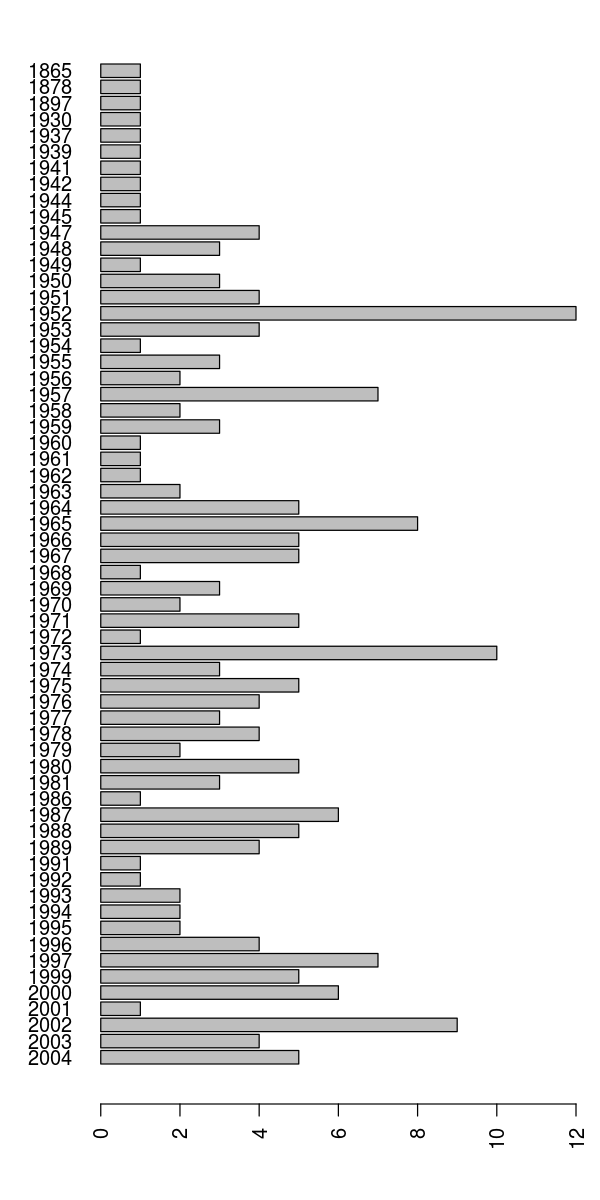

In [60]:
options(repr.plot.width = 5, repr.plot.height = 10)
par(mar = c(4, 4, 1, 1))
barplot(
    rev(summaries$Year)
    , horiz = T
    , las = 2
)

Jednotlivé funkce a jejich argumenty v předchozím příkladě necháme zatím bez podrobnějšího vysvětlení, neboť kreselení grafů v R bude předmětem jedné z dalších lekcí. Zatím zmíníme jen to, že jsme si pomocí funkce `options` nejprve nastavili větší kreslící plochu (5x10 palců) a na ní pak vakreslili náš graf pomocí funkce `barplot`. Funkce `par` řídí různé globální parametry vykreslovaných grafů a my jsme ji použili k manuálnímu nastavení okrajů našeho atypického sloupcového grafu.

Z obrázku tedy vidíme, ve kterých letech došlo k nejvíce událostem. Mimozemšťané byli zřejmě nejaktivnější v letech 1952, 1973 a 2002. Zároveň je vidět i nárůst v zaznamenaných pozorováních po skončení druhé světové války.

S našimi výsledky bychom si samozřejmě mohli dál hrát a zkoumat různé úhly pohledu a různé podmnožiny souboru. Jako například analyzovat data o pozorováních pouze v USA:

In [61]:
df_ufocase_usa <- df_ufocase[df_ufocase$Location == "USA",]
unique(df_ufocase_usa$Location)

[1] USA
39 Levels: Alaska Australia Austria Belgium Brazil Canada Chile ... Wales

nebo pouze data, kde došlo k unesení mimozemšťanem:

In [62]:
df_ufocase_abd <- df_ufocase[df_ufocase$Abduction == 1,]
df_ufocase_abd

,Year,EventName,Location,PhysicalEffects,Multimedia,ETContact,Abduction
52,1957,Villas-Boas Encounter,Brazil,1,0,1,1
61,1961,Betty and Barney Hill Abduction,USA,1,0,1,1
83,1967,The Betty Andreasson Abduction,USA,1,0,1,1
87,1967,Patrolman Herbert Schirmer abducted,USA,1,0,1,1
91,1969,The Buff Ledge Camp Abduction,USA,1,0,1,1
101,1973,The Judy Doraty Abduction,USA,1,0,1,1
108,1973,"Pascagoula, Mississippi Abduction",USA,1,0,1,1
114,1975,Sergeant Charles L. Moody Abduction,USA,1,0,1,1
117,1975,The Travis Walton Abduction,USA,1,0,1,1
118,1976,"The Stanford, Kentucky Abductions",USA,1,0,1,1


Pokud vás zajímá rychlý souhrn dat ve vaší tabulce, můžete si jej snadno vytisknout pomocí funkce `summary`:

In [63]:
summary(df_ufocase)

      Year      EventName              Location   PhysicalEffects Multimedia
 1952   : 12   Length:203         USA      :122   0: 74           0:141     
 1973   : 10   Class :character   U K      : 10   1:129           1: 62     
 2002   :  9   Mode  :character   Australia:  9                             
 1965   :  8                      Canada   :  7                             
 1957   :  7                      Russia   :  6                             
 1997   :  7                      Brazil   :  5                             
 (Other):150                      (Other)  : 44                             
 ETContact Abduction
 0:146     0:182    
 1: 57     1: 21    
                    
                    
                    
                    
                    

Zde na jednom místě vidíme jak roky s největším počtem incidentů, tak další data jako například země s největším počtem zaznamenaných událostí nebo počet událostí, pro které existuje záznam.

## tapply

Další užitečnou funkcí pro procházení prvků datových struktur je `tapply`. Tato funkce se nejčastěji používa s faktory nebo se strukturami, které lze na faktory převést, a umožňuje uživateli procházet jednotlivé položky daného vektoru (nebo jiné lineární struktury) podle příslušnosti do skupin definované úrovněmi daného faktoru. Podrobněji to demonstruje následující příklad:

In [64]:
get_name_list <- function(x) {
    paste(x, collapse = "; ")
}

output <- tapply(
    df_ufocase$EventName
    , df_ufocase$Abduction
    , get_name_list
)

Tímto jednoduchým zavoláním jsme získali jednorozměrné pole, které má dva pojmenované řádky (je to tedy ekvivalent obyčejného vektoru s pojmenovanými položkami):

In [65]:
class(output)
dim(output)
nrow(output)
names(output)

[1] "array"

[1] 2

[1] 2

[1] "0" "1"

Jména odpovídají jednotlivým úrovním faktoru. V tomto případě 0 nebo 1 podle toho zda došlo k unesení nebo ne. Do naší funkce tedy postupně jako argument připlul vektor jmen událostí, ve kterých nedošlo k unesení, a hned potom událostí, ve kterých k unesení došlo. My jsme názvy ve funkci `get_names` pouze spojili do jednoho řetězce a vrátili. A takto spojená jména jsou skutečně i to, co najdeme v našem poli pod příslušným jménem. Například toto je tedy řetězec spojující všechny případy unesení:

In [66]:
output["1"]

1 
"Villas-Boas Encounter; Betty and Barney Hill Abduction; The Betty Andreasson Abduction; Patrolman Herbert Schirmer abducted; The Buff Ledge Camp Abduction; The Judy Doraty Abduction; Pascagoula, Mississippi Abduction; Sergeant Charles L. Moody Abduction; The Travis Walton Abduction; The Stanford, Kentucky Abductions; The Allagash Waterway Abductions; Hudson Valley Abduction; The Christa Tilton Story; North Canol Road Abduction; The Ilkley Moor Alien; John Salter and Son Abduction; DNA Sample / Khoury Abduction; Linda Cortile-Napolitano Abduction; The Kelly Cahill Abduction; Abduction in Wales; Abduction in Illinois"

Druhým argumentem může být i více faktorů najednou:

In [67]:
output <- tapply(
    df_ufocase$EventName
    , list(
        df_ufocase$Year
        , df_ufocase$Abduction
    )
    , get_name_list
)

Výsledkem je v tomto případě matice:

In [68]:
class(output)
dim(output)
rownames(output)
colnames(output)

[1] "matrix"

[1] 62  2

[1] "1865" "1878" "1897" "1930" "1937" "1939" "1941" "1942" "1944" "1945"
[11] "1947" "1948" "1949" "1950" "1951" "1952" "1953" "1954" "1955" "1956"
[21] "1957" "1958" "1959" "1960" "1961" "1962" "1963" "1964" "1965" "1966"
[31] "1967" "1968" "1969" "1970" "1971" "1972" "1973" "1974" "1975" "1976"
[41] "1977" "1978" "1979" "1980" "1981" "1986" "1987" "1988" "1989" "1991"
[51] "1992" "1993" "1994" "1995" "1996" "1997" "1999" "2000" "2001" "2002"
[61] "2003" "2004"

[1] "0" "1"

V této matici představují úrovně prvního faktoru ("Year") řádky a úrovně druhého ("Abduction") sloupce. V jednotlivých buňkách se pak nachází data vrácená naší funkcí. Dostáváme tedy informaci o tom, ke kterým událostem došlo v konkrétních letech a zároveň je máme rozdělené podle toho, zda se jednalo o unesení či nikoliv:

In [69]:
tail(output, 10)

,0,1
1994,"UFO Sightings in Holland, Michigan; UFO Photographed in Mongo, Indiana",NA
1995,American West 564 UFO Encounter; UFO Crash in Israel,NA
1996,"The Varginha, Brazil Entity; Alien Body Recovered; UFO Photograph Case, Alabama; UFO Photo Hungary",NA
1997,"UFOs merging on film; St. Petersburg, Russia UFO; The Phoenix, Arizona Lights; UFO Encounter, Boyne Island; Swissair jet / near miss UFO; South Africa UFO Encounter",Abduction in Wales
1999,Aliens photographed in London; Jet Crew Encounters UFO; British Charter Encounters UFO; UFO Crash in Swedish Lake,Abduction in Illinois
2000,The Illinois Sightings; UFO Photographed / Stinson Lake; UFO shoots beam at photographer; UFO landing in West Malaysia; The Twin Towers UFO Video(hoax); UFO Visits Idaho Mountain,NA
2001,"Waynesville, Ohio Police UFO Report",NA
2002,"Roswell (General Ramey Memo); Gulfport, Mississippi UFO Incident; Trenton / Brookville UFO Sightings; Tyrone, PA Sighting & Photograph; The Albany Airport UFO Video; Rendlesham Documents released; The Leyland, Lancashire Videos; Afyon, Turkey Sighting with Video; Possible UFO Landing, Chile",NA
2003,"UFO Photographed / Wisconsin; UFO Video / Tennessee, Shaffer; UFO Incident, Screaming Sounds; Ashland, Nebraska UFO Video",NA
2004,"Amelia, Ohio Bizarre UFO Incident; Mexican Military Releases UFO Footage; Centerville, Ohio UFO Report; Close Encounter in Tennessee; Northern Ohio Sightings",NA


Naše funkce zatím vracela pouze řetězec. Jak je to ale s funkcí, která vrací prvků více?

In [70]:
output <- tapply(
    df_ufocase$EventName
    , list(
        df_ufocase$Year
        , df_ufocase$Abduction
    )
    , function(x) x
)
        
class(output)
mode(output)
dim(output)
tail(output, 10)

[1] "matrix"

[1] "list"

[1] 62  2

,0,1
1994,"UFO Sightings in Holland, Michigan, UFO Photographed in Mongo, Indiana",NULL
1995,"American West 564 UFO Encounter, UFO Crash in Israel",NULL
1996,"The Varginha, Brazil Entity , Alien Body Recovered , UFO Photograph Case, Alabama, UFO Photo Hungary",NULL
1997,"UFOs merging on film , St. Petersburg, Russia UFO , The Phoenix, Arizona Lights , UFO Encounter, Boyne Island , Swissair jet / near miss UFO, South Africa UFO Encounter",Abduction in Wales
1999,"Aliens photographed in London , Jet Crew Encounters UFO , British Charter Encounters UFO, UFO Crash in Swedish Lake",Abduction in Illinois
2000,"The Illinois Sightings , UFO Photographed / Stinson Lake, UFO shoots beam at photographer, UFO landing in West Malaysia , The Twin Towers UFO Video(hoax), UFO Visits Idaho Mountain",NULL
2001,"Waynesville, Ohio Police UFO Report",NULL
2002,"Roswell (General Ramey Memo) , Gulfport, Mississippi UFO Incident, Trenton / Brookville UFO Sightings, Tyrone, PA Sighting & Photograph , The Albany Airport UFO Video , Rendlesham Documents released , The Leyland, Lancashire Videos , Afyon, Turkey Sighting with Video , Possible UFO Landing, Chile",NULL
2003,"UFO Photographed / Wisconsin , UFO Video / Tennessee, Shaffer, UFO Incident, Screaming Sounds, Ashland, Nebraska UFO Video",NULL
2004,"Amelia, Ohio Bizarre UFO Incident , Mexican Military Releases UFO Footage, Centerville, Ohio UFO Report , Close Encounter in Tennessee , Northern Ohio Sightings",NULL


Jak vidíte, chování funkce je analogické jako například v případě funkce `sapply`, která též v podobné situaci uživateli vrátí matici seznamů. Tento seznam má vždy jeden prvek, ve kterém je uložena naše návratová hodnota:

In [71]:
output["1999", "0"]

[[1]]
[1] "Aliens photographed in London"  "Jet Crew Encounters UFO"       
[3] "British Charter Encounters UFO" "UFO Crash in Swedish Lake"

Toto je tedy vektor událostí z roku 1999, kde mimozemšťané nikoho neunesli:

In [72]:
unlist(output["1999", "0"])

[1] "Aliens photographed in London"  "Jet Crew Encounters UFO"       
[3] "British Charter Encounters UFO" "UFO Crash in Swedish Lake"

## Funkce `by`

Funkce by je v podstatě `tapply`, ale jejím prvním parametrem není pouze lineární datová struktura (např. jeden sloupec datové tabulky), ale vícerozměrný objekt. Do naší funkce tedy jako parametr dostáváme celou podmnožinu daného objektu. Pro náší datovou tabulku s pozorováním UFO to například dopadne takto:

In [73]:
output <- by(
    df_ufocase
    , df_ufocase$Year
    , function(x) x
)
        
class(output)
mode(output)
dim(output)
names(output)
class(output[["1999"]])
output[["1999"]]

[1] "by"

[1] "list"

[1] 62

[1] "1865" "1878" "1897" "1930" "1937" "1939" "1941" "1942" "1944" "1945"
[11] "1947" "1948" "1949" "1950" "1951" "1952" "1953" "1954" "1955" "1956"
[21] "1957" "1958" "1959" "1960" "1961" "1962" "1963" "1964" "1965" "1966"
[31] "1967" "1968" "1969" "1970" "1971" "1972" "1973" "1974" "1975" "1976"
[41] "1977" "1978" "1979" "1980" "1981" "1986" "1987" "1988" "1989" "1991"
[51] "1992" "1993" "1994" "1995" "1996" "1997" "1999" "2000" "2001" "2002"
[61] "2003" "2004"

[1] "data.frame"

,Year,EventName,Location,PhysicalEffects,Multimedia,ETContact,Abduction
174,1999,Aliens photographed in London,U K,0,1,1,0
175,1999,Jet Crew Encounters UFO,Den.,0,0,0,0
176,1999,British Charter Encounters UFO,U K,0,0,0,0
177,1999,UFO Crash in Swedish Lake,Sweden,0,0,0,0
178,1999,Abduction in Illinois,USA,1,0,1,1


Výsledkem je tedy objekt třídy `by`, který agreguje výsledky volání této funkce. V našem případě je to pouze dlouhý seznam, jehož položky jsou pojmenované podle jednotlivých let (tedy úrovní faktoru, podle kterého jsme původní tabulku rozdělili). 

V případě použití více faktorů je výsledný objekt dvourozměrný:

In [74]:
output <- by(
    df_ufocase
    , list(
        df_ufocase$Year
        , df_ufocase$Abduction
    )
    , function(x) x
)
        
class(output)
mode(output)
dim(output)        
dimnames(output)
output[["1999", "0"]]
class(output[["1999", "0"]])

[1] "by"

[1] "list"

[1] 62  2

[[1]]
 [1] "1865" "1878" "1897" "1930" "1937" "1939" "1941" "1942" "1944" "1945"
[11] "1947" "1948" "1949" "1950" "1951" "1952" "1953" "1954" "1955" "1956"
[21] "1957" "1958" "1959" "1960" "1961" "1962" "1963" "1964" "1965" "1966"
[31] "1967" "1968" "1969" "1970" "1971" "1972" "1973" "1974" "1975" "1976"
[41] "1977" "1978" "1979" "1980" "1981" "1986" "1987" "1988" "1989" "1991"
[51] "1992" "1993" "1994" "1995" "1996" "1997" "1999" "2000" "2001" "2002"
[61] "2003" "2004"

[[2]]
[1] "0" "1"

,Year,EventName,Location,PhysicalEffects,Multimedia,ETContact,Abduction
174,1999,Aliens photographed in London,U K,0,1,1,0
175,1999,Jet Crew Encounters UFO,Den.,0,0,0,0
176,1999,British Charter Encounters UFO,U K,0,0,0,0
177,1999,UFO Crash in Swedish Lake,Sweden,0,0,0,0


[1] "data.frame"

Jak vidíte, každá dimenze je opět pojmenovaná podle jednotlivých úrovní faktorů, podle kterých jsme data dělili. Po dotazu na konkrétní položku objektu pak dostaneme opět tabulku, která obsahuje příslušná data.

Funkce `by` by se nám mohla hodit například pro stanovení procentuálního počtu přímých kontatků s mimozemšťanem, které skončily v jednotlivých lokacích unesením:

In [75]:
get_abd_perc <- function(data) {
    contacts <- sum(data[["ETContact"]] == 1)
    abductions <- sum(data[["Abduction"]] == 1)
    
    100 * (abductions / contacts)
}

output <- by(
    df_ufocase
    , df_ufocase$Location
    , get_abd_perc
)

sort(output, decreasing = T)

df_ufocase$Location
Australia     Wales    Brazil    Canada       USA       U K    Alaska    France 
  100.000   100.000    50.000    50.000    46.875    25.000     0.000     0.000 
      GOM     Malta    Mexico  N Guinea   P. Rico    Russia    S Amer     Spain 
    0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000 
    Switz 
    0.000

## Funkce `split`

Funkce `split` vlastně postupuje stejné jako `tapply`, ale bez zavolání funkce. V podstatě jen daný vektor rozdělí do skupin tak, jak je definováno úrovněmi faktoru:

In [76]:
output <- split(df_ufocase$EventName, df_ufocase$Year)

class(output)
names(output)
tail(output)

[1] "list"

[1] "1865" "1878" "1897" "1930" "1937" "1939" "1941" "1942" "1944" "1945"
[11] "1947" "1948" "1949" "1950" "1951" "1952" "1953" "1954" "1955" "1956"
[21] "1957" "1958" "1959" "1960" "1961" "1962" "1963" "1964" "1965" "1966"
[31] "1967" "1968" "1969" "1970" "1971" "1972" "1973" "1974" "1975" "1976"
[41] "1977" "1978" "1979" "1980" "1981" "1986" "1987" "1988" "1989" "1991"
[51] "1992" "1993" "1994" "1995" "1996" "1997" "1999" "2000" "2001" "2002"
[61] "2003" "2004"

$`1999`
[1] "Aliens photographed in London"  "Jet Crew Encounters UFO"       
[3] "British Charter Encounters UFO" "UFO Crash in Swedish Lake"     
[5] "Abduction in Illinois"         

$`2000`
[1] "The Illinois Sightings"          "UFO Photographed / Stinson Lake"
[3] "UFO shoots beam at photographer" "UFO landing in West Malaysia"   
[5] "The Twin Towers UFO Video(hoax)" "UFO Visits Idaho Mountain"      

$`2001`
[1] "Waynesville, Ohio Police UFO Report"

$`2002`
[1] "Roswell (General Ramey Memo)"       "Gulfport, Mississippi UFO Incident"
[3] "Trenton / Brookville UFO Sightings" "Tyrone, PA Sighting & Photograph"  
[5] "The Albany Airport UFO Video"       "Rendlesham Documents released"     
[7] "The Leyland, Lancashire Videos"     "Afyon, Turkey Sighting with Video" 
[9] "Possible UFO Landing, Chile"       

$`2003`
[1] "UFO Photographed / Wisconsin"   "UFO Video / Tennessee, Shaffer"
[3] "UFO Incident, Screaming Sounds" "Ashland, Nebraska UFO Video"   

$`2004`
[1] "Amelia, Ohio Bizarre UFO Incident"    
[2] "Mexican Military Releases UFO Footage"
[3] "Centerville, Ohio UFO Report"         
[4] "Close Encounter in Tennessee"         
[5] "Northern Ohio Sightings"

Dostali jsme tedy seznam, ve kterém každá položka reprezentuje jeden rok a obsahuje jména událostí v daném roce jako vektor.

Na rozdíl od funkce `tapply` můžete s funkcí `split` použít rovnou celý `data.frame`:

In [77]:
output <- split(df_ufocase, df_ufocase$Year)

class(output)
names(output)
tail(output, 2)

[1] "list"

[1] "1865" "1878" "1897" "1930" "1937" "1939" "1941" "1942" "1944" "1945"
[11] "1947" "1948" "1949" "1950" "1951" "1952" "1953" "1954" "1955" "1956"
[21] "1957" "1958" "1959" "1960" "1961" "1962" "1963" "1964" "1965" "1966"
[31] "1967" "1968" "1969" "1970" "1971" "1972" "1973" "1974" "1975" "1976"
[41] "1977" "1978" "1979" "1980" "1981" "1986" "1987" "1988" "1989" "1991"
[51] "1992" "1993" "1994" "1995" "1996" "1997" "1999" "2000" "2001" "2002"
[61] "2003" "2004"

,Year,EventName,Location,PhysicalEffects,Multimedia,ETContact,Abduction
195,2003,UFO Photographed / Wisconsin,USA,0,1,0,0
196,2003,"UFO Video / Tennessee, Shaffer",USA,0,1,0,0
197,2003,"UFO Incident, Screaming Sounds",USA,1,0,0,0
198,2003,"Ashland, Nebraska UFO Video",USA,0,1,0,0
,Year,EventName,Location,PhysicalEffects,Multimedia,ETContact,Abduction
199,2004,"Amelia, Ohio Bizarre UFO Incident",USA,1,0,0,0
200,2004,Mexican Military Releases UFO Footage,Mexico,1,1,0,0
201,2004,"Centerville, Ohio UFO Report",USA,1,0,0,0
202,2004,Close Encounter in Tennessee,USA,1,0,0,0
203,2004,Northern Ohio Sightings,USA,1,0,0,0


Výsledkem je pak tedy obdobný seznam, ale jeho položkami jsou datové tabulky reprezentující konkrétní podmnožiny té původní. V případě použití funkce `by` jsou toto vlastně jednotlivé argumenty, které vstupují do volané funkce.